LINEAR REGRESSION

Climate Change
There have been many studies documenting that the average global temperature has been increasing over the last century. The consequences of a continued rise in global temperature will be dire. Rising sea levels and an increased frequency of extreme weather events will affect billions of people.

In this study, we will attempt to study the relationship between average global temperature and several other factors.

The file climate_change (CSV) contains climate data from May 1983 to December 2008. The available variables include:

Year: the observation year.
Month: the observation month.
Temp: the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.
CO2, N2O, CH4, CFC.11, CFC.12: atmospheric concentrations of carbon dioxide (CO2), nitrous oxide (N2O), methane  (CH4), trichlorofluoromethane (CCl3F; commonly referred to as CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12), respectively. This data comes from the ESRL/NOAA Global Monitoring Division.
CO2, N2O and CH4 are expressed in ppmv (parts per million by volume  -- i.e., 397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere)
CFC.11 and CFC.12 are expressed in ppbv (parts per billion by volume). 
Aerosols: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space. This data is from the Godard Institute for Space Studies at NASA.
TSI: the total solar irradiance (TSI) in W/m2 (the rate at which the sun's energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project website.
MEI: multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures). This data comes from the ESRL/NOAA Physical Sciences Division.

## Importing the libraries

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [92]:
dataset = pd.read_csv('climate_change.csv')

## Splitting the dataset into the Training set and Test set

In [93]:
dataset.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


We are interested in how changes in these variables affect future temperatures, as well as how well these variables explain temperature changes so far. To do this, first we read the dataset climate_change.csv.

Then, split the data into a training set, consisting of all the observations up to and including 2006, and a testing set consisting of the remaining years. A training set refers to the data that will be used to build the model and a testing set refers to the data we will use to test our predictive ability.

In [94]:
train = dataset[dataset["Year"]<=2006]

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 283
Data columns (total 11 columns):
Year        284 non-null int64
Month       284 non-null int64
MEI         284 non-null float64
CO2         284 non-null float64
CH4         284 non-null float64
N2O         284 non-null float64
CFC-11      284 non-null float64
CFC-12      284 non-null float64
TSI         284 non-null float64
Aerosols    284 non-null float64
Temp        284 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [96]:
train.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [97]:
train.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
279,2006,8,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,2006,9,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,2006,10,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,2006,11,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440
283,2006,12,0.951,381.79,1795.04,320.451,248.480,539.377,1365.7087,0.0054,0.518


In [98]:
test = dataset[dataset["Year"]>2006]

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 284 to 307
Data columns (total 11 columns):
Year        24 non-null int64
Month       24 non-null int64
MEI         24 non-null float64
CO2         24 non-null float64
CH4         24 non-null float64
N2O         24 non-null float64
CFC-11      24 non-null float64
CFC-12      24 non-null float64
TSI         24 non-null float64
Aerosols    24 non-null float64
Temp        24 non-null float64
dtypes: float64(9), int64(2)
memory usage: 2.2 KB


In [100]:
test.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,2007,1,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,2007,2,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
286,2007,3,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045,0.435
287,2007,4,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045,0.466
288,2007,5,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041,0.372


In [101]:
test.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [102]:
train.drop(["Year","Month"], axis = 1)

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


In [103]:
Mtrain = train.drop(["Year","Month"], axis = 1)

In [104]:
Mtest = test.drop(["Year","Month"], axis = 1)

In [129]:
Mtrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MEI,284.0,0.341923,0.929639,-1.5860,-0.32300,0.3085,0.898000,3.0010
CO2,284.0,361.414261,11.439691,340.1700,352.31500,359.8900,370.585000,384.9800
CH4,284.0,1745.841479,45.669846,1629.8900,1716.34750,1758.6050,1781.637500,1808.1500
N2O,284.0,311.657225,4.758513,303.6770,307.65700,310.8495,316.129250,320.4510
CFC-11,284.0,252.487092,20.987671,191.3240,249.55775,260.3735,267.448000,271.4940
CFC-12,284.0,494.217546,59.046642,350.1130,462.54300,522.0890,540.972750,543.8130
TSI,284.0,1366.101437,0.401283,1365.4261,1365.75455,1366.0545,1366.399275,1367.3162
Aerosols,284.0,0.017721,0.030014,0.0016,0.00270,0.0062,0.014000,0.1494
Temp,284.0,0.247799,0.181136,-0.2820,0.11800,0.2325,0.406500,0.7390


In [105]:
Mtrain.corr()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
MEI,1.000000,-0.041147,-0.033419,-0.050820,0.069000,0.008286,-0.154492,0.340238,0.172471
CO2,-0.041147,1.000000,0.877280,0.976720,0.514060,0.852690,0.177429,-0.356155,0.788529
CH4,-0.033419,0.877280,1.000000,0.899839,0.779904,0.963616,0.245528,-0.267809,0.703255
N2O,-0.050820,0.976720,0.899839,1.000000,0.522477,0.867931,0.199757,-0.337055,0.778639
CFC-11,0.069000,0.514060,0.779904,0.522477,1.000000,0.868985,0.272046,-0.043921,0.407710
CFC-12,0.008286,0.852690,0.963616,0.867931,0.868985,1.000000,0.255303,-0.225131,0.687558
TSI,-0.154492,0.177429,0.245528,0.199757,0.272046,0.255303,1.000000,0.052117,0.243383
Aerosols,0.340238,-0.356155,-0.267809,-0.337055,-0.043921,-0.225131,0.052117,1.000000,-0.384914
Temp,0.172471,0.788529,0.703255,0.778639,0.407710,0.687558,0.243383,-0.384914,1.000000


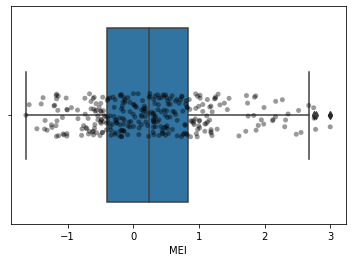

In [106]:
sns.boxplot(x=dataset['MEI'])
sns.stripplot(x=dataset['MEI'],size =5, color = 'black', alpha=0.4)

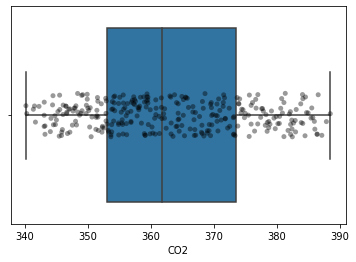

In [107]:
sns.boxplot(x=dataset['CO2'])
sns.stripplot(x=dataset['CO2'],size =5, color = 'black', alpha=0.4)

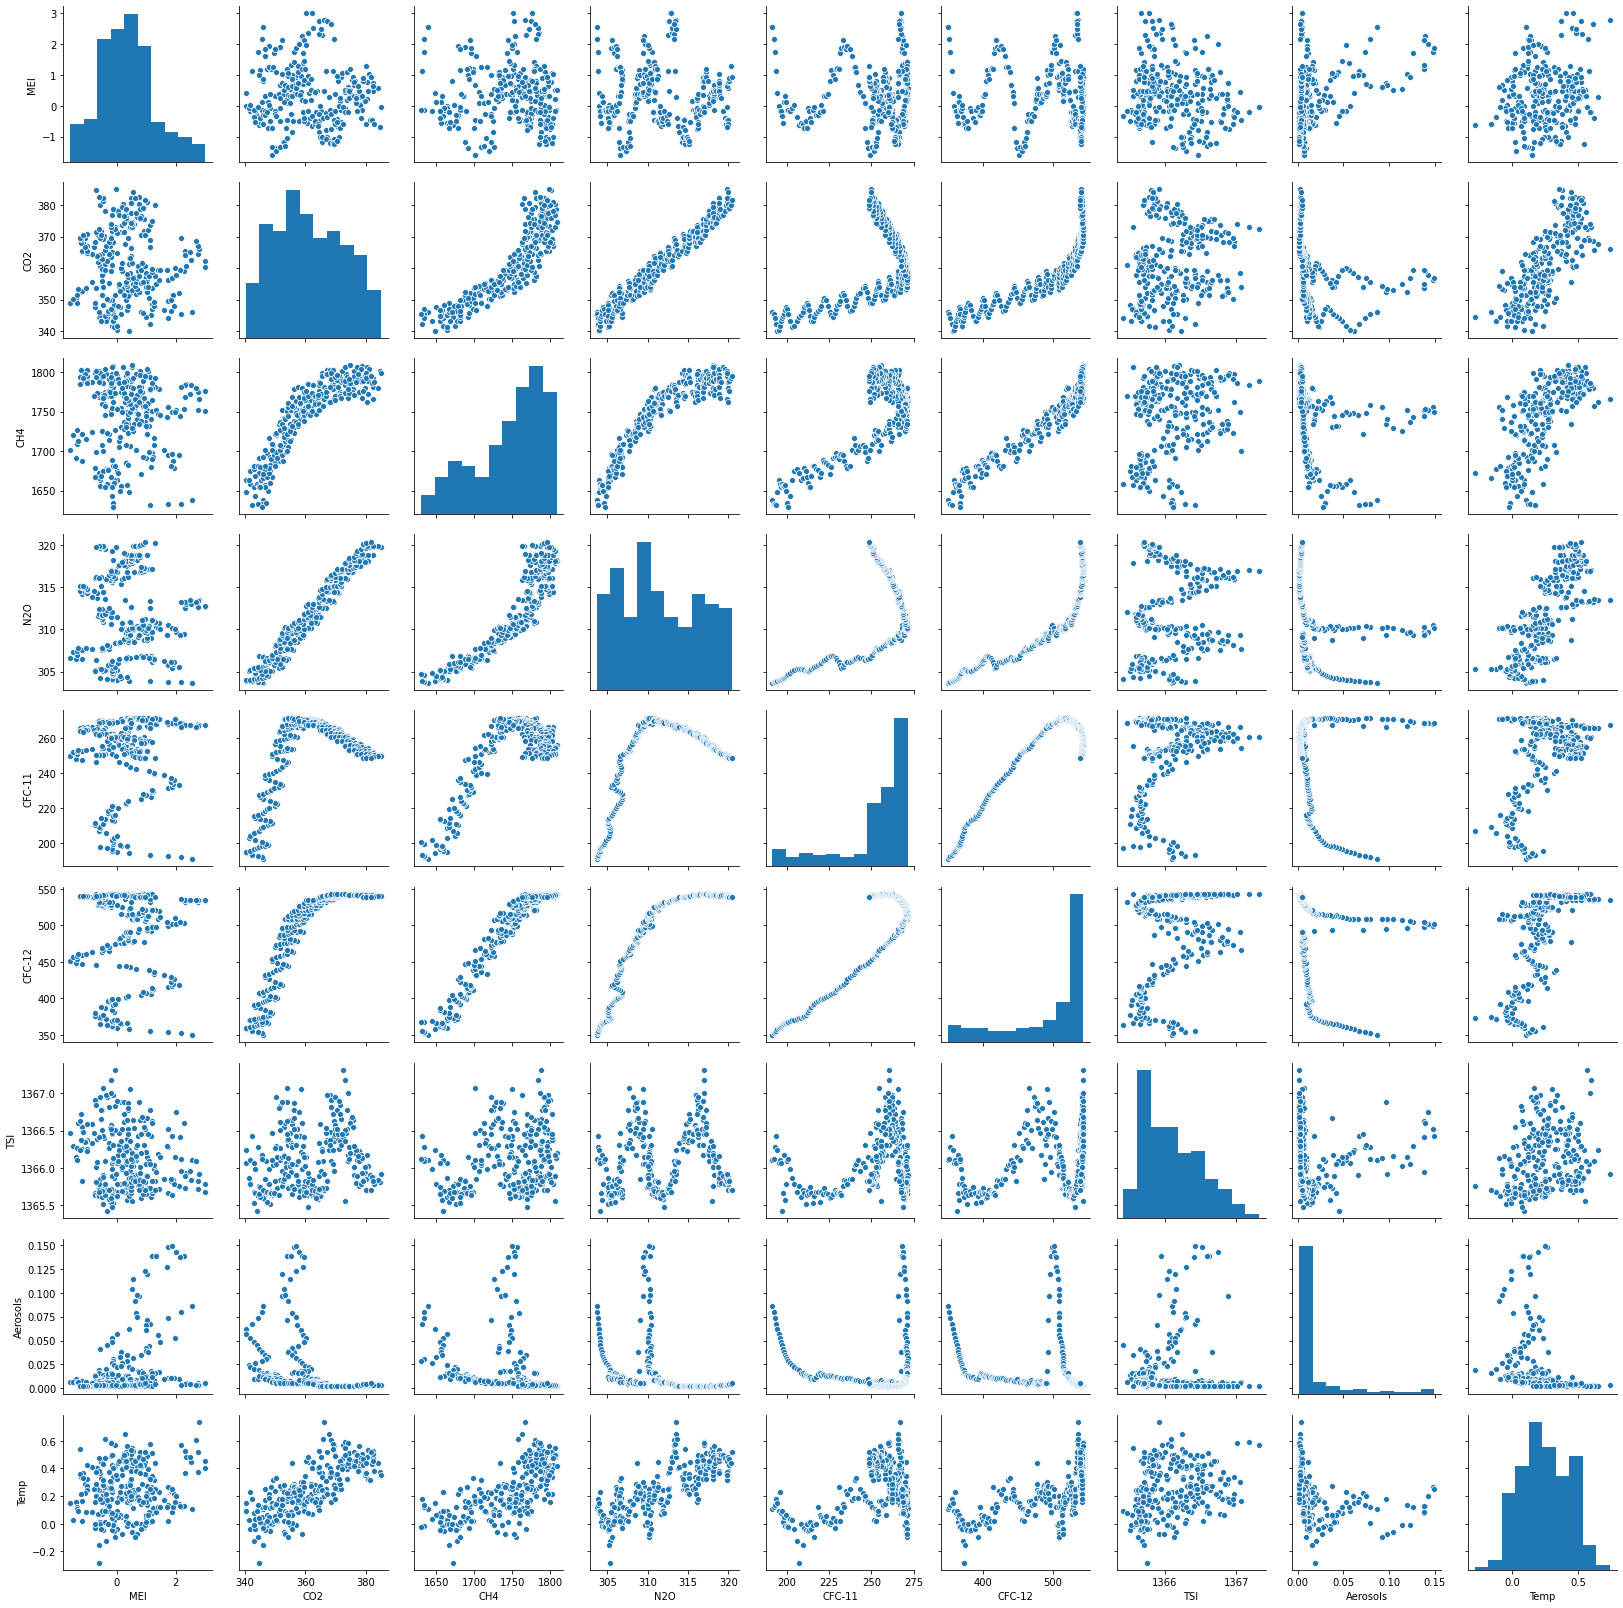

In [108]:
sns.pairplot(Mtrain)

In [109]:
X_train = Mtrain.iloc[:, :-1].values
y_train = Mtrain.iloc[:, -1].values

In [110]:
X_train

array([[2.5560000e+00, 3.4596000e+02, 1.6385900e+03, ..., 3.5011300e+02,
        1.3661024e+03, 8.6300000e-02],
       [2.1670000e+00, 3.4552000e+02, 1.6337100e+03, ..., 3.5184800e+02,
        1.3661208e+03, 7.9400000e-02],
       [1.7410000e+00, 3.4415000e+02, 1.6332200e+03, ..., 3.5372500e+02,
        1.3662850e+03, 7.3100000e-02],
       ...,
       [8.9200000e-01, 3.7916000e+02, 1.7890200e+03, ..., 5.3948800e+02,
        1.3658270e+03, 4.4000000e-03],
       [1.2920000e+00, 3.8018000e+02, 1.7919100e+03, ..., 5.3950000e+02,
        1.3657039e+03, 4.9000000e-03],
       [9.5100000e-01, 3.8179000e+02, 1.7950400e+03, ..., 5.3937700e+02,
        1.3657087e+03, 5.4000000e-03]])

In [111]:
y_train

array([ 0.109,  0.118,  0.137,  0.176,  0.149,  0.093,  0.232,  0.078,
        0.089,  0.013,  0.049, -0.019,  0.065, -0.016, -0.024,  0.034,
        0.025, -0.035, -0.123, -0.282, -0.001, -0.155, -0.032, -0.042,
        0.001, -0.049, -0.042,  0.013, -0.035, -0.008, -0.093, -0.002,
        0.121,  0.065,  0.049,  0.045,  0.023,  0.055,  0.004, -0.001,
        0.016,  0.043, -0.033,  0.022,  0.116,  0.266,  0.021,  0.084,
        0.145,  0.121,  0.238,  0.219,  0.25 ,  0.174,  0.186,  0.314,
        0.334,  0.189,  0.248,  0.224,  0.175,  0.2  ,  0.168,  0.154,
        0.149,  0.12 ,  0.027,  0.106,  0.019,  0.094,  0.088,  0.083,
        0.073,  0.094,  0.167,  0.168,  0.135,  0.145,  0.067,  0.181,
        0.187,  0.242,  0.442,  0.285,  0.231,  0.233,  0.196,  0.227,
        0.179,  0.271,  0.278,  0.199,  0.224,  0.272,  0.161,  0.299,
        0.249,  0.269,  0.271,  0.225,  0.176,  0.133,  0.079,  0.084,
        0.266,  0.25 ,  0.199,  0.132,  0.125,  0.118, -0.008, -0.007,
      

## Training the Simple Linear Regression model on the Training set

Next, build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables. We use the training set to build the model.

In [112]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
regressor.score(X_train, y_train)

0.7508932770523418

In [114]:
est = sm.OLS(y_train, X_train)

In [115]:
est2 = est.fit()

In [116]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              314.3
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                   7.35e-134
Time:                        18:01:16   Log-Likelihood:                          261.15
No. Observations:                 284   AIC:                                     -506.3
Df Residuals:                     276   BIC:                                     -477.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that are able to trap heat from the sun and contribute to the heating of the Earth. However, the regression coefficients of both the N2O and CFC-11 variables are negative, indicating that increasing atmospheric concentrations of either of these two compounds is associated with lower global temperatures. Reason: N2O and CFC.11 are correlated with other variables in the data set.

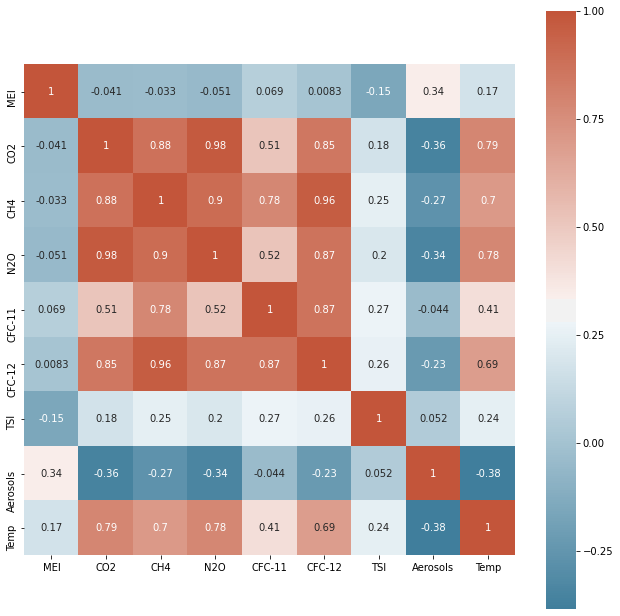

In [117]:
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.subplots(figsize=(11,11))
sns.heatmap(Mtrain.corr(), annot = True, cmap = cmap, square = True)

Given that the correlations are so high, let us focus on the N2O variable and build a model with only MEI, TSI, Aerosols and N2O as independent variables.

In [118]:
MX_train = Mtrain[["MEI", "TSI", "Aerosols", "N2O"]]
My_train = Mtrain[["Temp"]]

In [119]:
Modifiedregressor = LinearRegression()
Modifiedregressor.fit(MX_train, My_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
Modifiedregressor.score(MX_train, My_train)

0.7261321279511144

In [121]:
est = sm.OLS(My_train, MX_train)

In [122]:
est2 = est.fit()

In [123]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Temp   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              587.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                   7.66e-135
Time:                        18:01:18   Log-Likelihood:                          250.76
No. Observations:                 284   AIC:                                     -493.5
Df Residuals:                     280   BIC:                                     -478.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------